In [34]:
from fitparse import FitFile
import tcxparser
from datetime import datetime

wahoo = tcxparser.TCXParser('./data/20200424_133848.tcx')
garmin = FitFile('./data/Afternoon_Ride.fit')

In [37]:
wahoo_time_hr = list(zip(list(map(lambda x: datetime.fromisoformat(x[:-1]), wahoo.time_values())), wahoo.hr_values()))

wahoo_time_hr

[(datetime.datetime(2020, 4, 24, 13, 38, 48), 114),
 (datetime.datetime(2020, 4, 24, 13, 38, 49), 112),
 (datetime.datetime(2020, 4, 24, 13, 38, 56), 107),
 (datetime.datetime(2020, 4, 24, 13, 39, 2), 112),
 (datetime.datetime(2020, 4, 24, 13, 39, 5), 119),
 (datetime.datetime(2020, 4, 24, 13, 39, 8), 123),
 (datetime.datetime(2020, 4, 24, 13, 39, 11), 126),
 (datetime.datetime(2020, 4, 24, 13, 39, 15), 124),
 (datetime.datetime(2020, 4, 24, 13, 39, 19), 122),
 (datetime.datetime(2020, 4, 24, 13, 39, 21), 122),
 (datetime.datetime(2020, 4, 24, 13, 39, 23), 123),
 (datetime.datetime(2020, 4, 24, 13, 39, 25), 124),
 (datetime.datetime(2020, 4, 24, 13, 39, 27), 125),
 (datetime.datetime(2020, 4, 24, 13, 39, 29), 126),
 (datetime.datetime(2020, 4, 24, 13, 39, 31), 141),
 (datetime.datetime(2020, 4, 24, 13, 39, 35), 121),
 (datetime.datetime(2020, 4, 24, 13, 39, 39), 123),
 (datetime.datetime(2020, 4, 24, 13, 39, 43), 122),
 (datetime.datetime(2020, 4, 24, 13, 39, 47), 122),
 (datetime.date

In [25]:
garmin_time_hr = []
for data_message in garmin.get_messages():
    vals = data_message.get_values()
    if vals.get('timestamp') is not None and vals.get('heart_rate') is not None:
        garmin_time_hr += [(vals['timestamp'], vals['heart_rate'])]

garmin_time_hr

[(datetime.datetime(2020, 4, 24, 13, 38, 48), 112),
 (datetime.datetime(2020, 4, 24, 13, 38, 49), 111),
 (datetime.datetime(2020, 4, 24, 13, 38, 50), 110),
 (datetime.datetime(2020, 4, 24, 13, 38, 51), 109),
 (datetime.datetime(2020, 4, 24, 13, 38, 52), 109),
 (datetime.datetime(2020, 4, 24, 13, 38, 53), 109),
 (datetime.datetime(2020, 4, 24, 13, 38, 54), 109),
 (datetime.datetime(2020, 4, 24, 13, 38, 55), 109),
 (datetime.datetime(2020, 4, 24, 13, 38, 56), 109),
 (datetime.datetime(2020, 4, 24, 13, 38, 57), 109),
 (datetime.datetime(2020, 4, 24, 13, 38, 58), 110),
 (datetime.datetime(2020, 4, 24, 13, 38, 59), 111),
 (datetime.datetime(2020, 4, 24, 13, 39), 113),
 (datetime.datetime(2020, 4, 24, 13, 39, 1), 115),
 (datetime.datetime(2020, 4, 24, 13, 39, 2), 117),
 (datetime.datetime(2020, 4, 24, 13, 39, 3), 119),
 (datetime.datetime(2020, 4, 24, 13, 39, 4), 120),
 (datetime.datetime(2020, 4, 24, 13, 39, 5), 120),
 (datetime.datetime(2020, 4, 24, 13, 39, 6), 120),
 (datetime.datetime(20

In [55]:
import itertools

data_format = [{
    'datetime': datetime(2020, 4, 24, 13, 39, 1),
    'garmin_hr': 100,
    'wahoo_hr': 100
}]

idx_wahoo = 0
idx_garmin = 0

wahoo_last_hr = 0
garmin_last_hr = 0

bundled_time_hr = []

while idx_garmin < len(garmin_time_hr) and idx_wahoo < len(wahoo_time_hr):
    wahoo_time = wahoo_time_hr[idx_wahoo][0]
    wahoo_hr = wahoo_time_hr[idx_wahoo][1]

    garmin_time = garmin_time_hr[idx_garmin][0]
    garmin_hr = garmin_time_hr[idx_garmin][1]
    
    if garmin_time == wahoo_time:
        bundled_time_hr += [{
                'datetime': garmin_time,
                'garmin_hr': garmin_hr,
                'wahoo_hr': wahoo_hr
        }]
        wahoo_last_hr = wahoo_hr
        garmin_last_hr = garmin_hr
        idx_garmin += 1
        idx_wahoo += 1
    elif garmin_time < wahoo_time:
        bundled_time_hr += [{
                'datetime': garmin_time,
                'garmin_hr': garmin_hr,
                'wahoo_hr': wahoo_last_hr
        }]
        garmin_last_hr = garmin_hr
        idx_garmin += 1
    else:
        bundled_time_hr += [{
                'datetime': wahoo_time,
                'garmin_hr': garmin_last_hr,
                'wahoo_hr': wahoo_hr
        }]
        wahoo_last_hr = wahoo_hr
        idx_wahoo += 1

bundled_time_hr

[{'datetime': datetime.datetime(2020, 4, 24, 13, 38, 48),
  'garmin_hr': 112,
  'wahoo_hr': 114},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 49),
  'garmin_hr': 111,
  'wahoo_hr': 112},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 50),
  'garmin_hr': 110,
  'wahoo_hr': 112},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 51),
  'garmin_hr': 109,
  'wahoo_hr': 112},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 52),
  'garmin_hr': 109,
  'wahoo_hr': 112},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 53),
  'garmin_hr': 109,
  'wahoo_hr': 112},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 54),
  'garmin_hr': 109,
  'wahoo_hr': 112},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 55),
  'garmin_hr': 109,
  'wahoo_hr': 112},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 56),
  'garmin_hr': 109,
  'wahoo_hr': 107},
 {'datetime': datetime.datetime(2020, 4, 24, 13, 38, 57),
  'garmin_hr': 109,
  'wahoo_hr': 107},
 {'datetime': dateti

In [56]:
from statistics import mean 

wahoo_hr = [x['wahoo_hr'] for x in bundled_time_hr]
garmin_hr = [x['garmin_hr'] for x in bundled_time_hr]

len(wahoo_hr), len(garmin_hr), mean(wahoo_hr), mean(garmin_hr)

(8520, 8520, 141.31208920187794, 141.66772300469484)

In [57]:
garmin_hr = [x['garmin_hr'] for x in bundled_time_hr]
garmin_hr

[112,
 111,
 110,
 109,
 109,
 109,
 109,
 109,
 109,
 109,
 110,
 111,
 113,
 115,
 117,
 119,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 120,
 121,
 122,
 122,
 122,
 123,
 123,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 124,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 123,
 117,
 112,
 105,
 101,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 97,
 94,
 93,
 93,
 93,
 93,
 96,
 99,
 101,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 103,
 104,
 107,
 108,
 110,
 113,
 114,
 115,
 115,
 115,
 115,
 117,
 119,
 120,
 120,
 120,
 120,
 121,
 121,
 121,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 122,
 95,
 95,
 95,
 95,
 94,
 94,
 94,
 

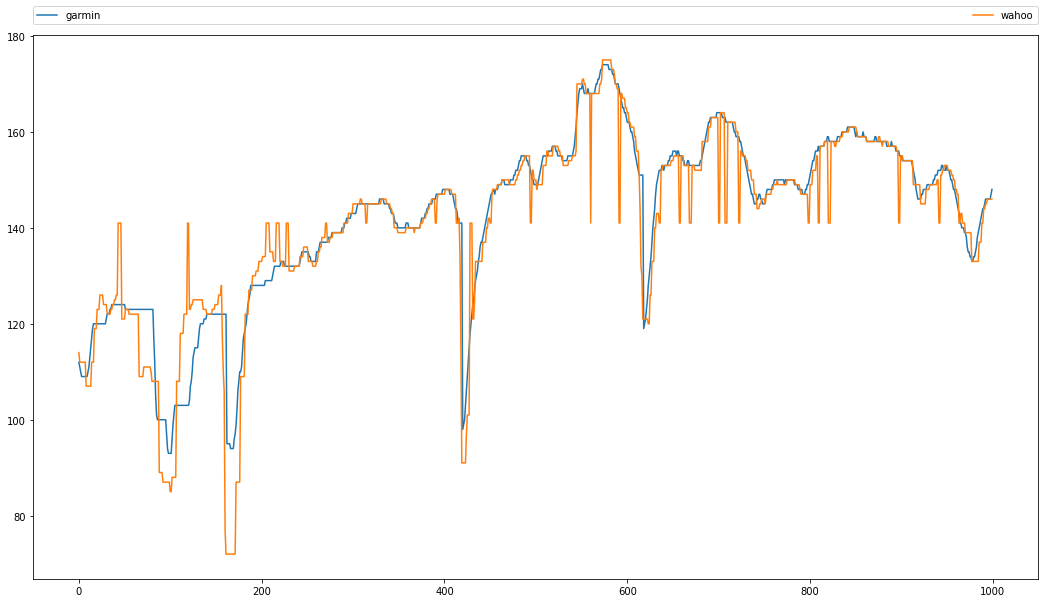

In [61]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(18, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.plot(garmin_hr[:1000], label='garmin')
plt.plot(wahoo_hr[:1000], label='wahoo')

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0.)
    
plt.show()